# kNN Analysis in ScikitLearn

k-Nearest Neighbors analysis is a useful supervised learning method for classification.  

A number of data points with any number of features (above zero) are passed into the analysis, each classified to a specific type.  Then, test data is passed into the algorithm, and each data point is classified based on it's nearest neighbors.  The "k" in kNN is the number of neighbors each test datum is compared to so a determination can be reached.

In [2]:
# import desired packages...
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Lots of data!  Remember, the reason why a computer is doing this is because of the huge number of features within the dataset.

The next part shows off an awesome part of Skikit: separating a large data set into training and testing sets for use later.

In [3]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, 
                                                                                      breast_cancer_data.target, test_size=0.2, 
                                                                                      random_state = 100)

# test to ensure data loaded correctly; if so, amounts are equal
print(len(training_data), len(training_labels))

455 455


An important part of using a kNN analysis is choosing a good _k_.  Too small of a _k_ can skew the outcome with outliers, while too large of a _k_ will lose the interesting parts of the dataset.

The following loops through and shows the relative accuracy of different k-values.  This can be helpful if you have the spare computing power.  To just make one model, substitute _i_ in the following `for` loop with your k-value, and run the first two lines of the loop.  The third line will provide an estimation of the trained algorithm's accuracy.

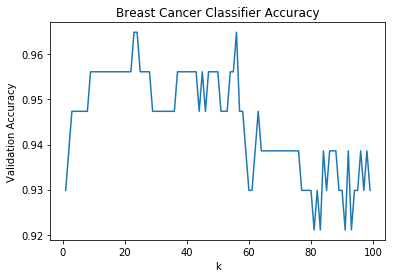

In [4]:
k_list = list(range(1, 100))
accuracies = []

for i in range(1, 100):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
  
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()